# Projet 7 :  Détectez les Bad Buzz grâce au Deep Learning
## Data_fetch
<font color = "grey"><i> Chargement des modules necessaires </i></font>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

import seaborn as sns
import warnings
import csv

warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')

# 1. Récupération des données

## a) Récupération des tweets postés par les clients

In [2]:
missing_values = ["na", "n/a", "--", " "]
data_df = pd.read_csv('data/training.1600000.processed.noemoticon.csv',
                      encoding='latin',
                      delimiter=",")
data_df = pd.read_csv('data/under_sampling_2000_op.csv',
                      encoding='latin',
                      delimiter=",")


data_df

,Unnamed: 0,tweet,target
0,30,@alielayus I want to go to promote GEAR AND GR...,0
1,198,couldn't get shit done today ~ i'm so screwed,0
2,362,@Sara_Kate Im afraid too ( ur reply about uni...,0
3,1279,"Yo jimo i cant talk on aim anymore, its glitch...",0
4,2112,@rustyrockets do I sense a blog coming on? To...,0
...,...,...,...
1995,1592304,@andrewtkelley that strawberry shortcake looks...,1
1996,1594844,@WinonaWiefel thanks,1
1997,1594991,photographing Day of the African Child celebra...,1
1998,1599678,@jasontancy thanks!,1


data_df.columns

data_df = data_df.rename(columns={'0': 'target',data_df.columns[2]: 'id',data_df.columns[3]: 'date',
                                  data_df.columns[4]: 'user',data_df.columns[5]: 'tweet'})

In [3]:
data_df['target_bin'] = data_df['target'].map({0: 0,
                                               1: 1})

In [4]:
data_df.head()
data_df['target'].unique()

array([0, 1], dtype=int64)

In [5]:
data_df['target'].value_counts()
data_df

,Unnamed: 0,tweet,target,target_bin
0,30,@alielayus I want to go to promote GEAR AND GR...,0,0
1,198,couldn't get shit done today ~ i'm so screwed,0,0
2,362,@Sara_Kate Im afraid too ( ur reply about uni...,0,0
3,1279,"Yo jimo i cant talk on aim anymore, its glitch...",0,0
4,2112,@rustyrockets do I sense a blog coming on? To...,0,0
...,...,...,...,...
1995,1592304,@andrewtkelley that strawberry shortcake looks...,1,1
1996,1594844,@WinonaWiefel thanks,1,1
1997,1594991,photographing Day of the African Child celebra...,1,1
1998,1599678,@jasontancy thanks!,1,1


In [6]:
data_df['target'] = data_df['target_bin'].map({0:'negative',1:'positive'})
data_df

,Unnamed: 0,tweet,target,target_bin
0,30,@alielayus I want to go to promote GEAR AND GR...,negative,0
1,198,couldn't get shit done today ~ i'm so screwed,negative,0
2,362,@Sara_Kate Im afraid too ( ur reply about uni...,negative,0
3,1279,"Yo jimo i cant talk on aim anymore, its glitch...",negative,0
4,2112,@rustyrockets do I sense a blog coming on? To...,negative,0
...,...,...,...,...
1995,1592304,@andrewtkelley that strawberry shortcake looks...,positive,1
1996,1594844,@WinonaWiefel thanks,positive,1
1997,1594991,photographing Day of the African Child celebra...,positive,1
1998,1599678,@jasontancy thanks!,positive,1


In [7]:
data_df['target'].unique()



array(['negative', 'positive'], dtype=object)

## b) Affichage des colonnes et lignes, ansi que leurs nombres


In [8]:
data_df_new  = data_df


In [9]:
nb_col_nan = data_df_new.isnull().sum()
nb_col_nan

Unnamed: 0    0
tweet         0
target        0
target_bin    0
dtype: int64

* Chargement des tweets dans une liste :

In [10]:
data_df_new["tweet"]

0       @alielayus I want to go to promote GEAR AND GR...
1          couldn't get shit done today ~ i'm so screwed 
2       @Sara_Kate Im afraid too  ( ur reply about uni...
3       Yo jimo i cant talk on aim anymore, its glitch...
4       @rustyrockets do I sense a blog coming on?  To...
                              ...                        
1995    @andrewtkelley that strawberry shortcake looks...
1996                                @WinonaWiefel thanks 
1997    photographing Day of the African Child celebra...
1998                                 @jasontancy thanks! 
1999                                    @SCOOBY_GRITBOYS 
Name: tweet, Length: 2000, dtype: object

In [11]:
tweets = []

for i in data_df_new.index:
    tweets.append(data_df_new["tweet"][i].strip())


## b) Utilisation de l'API pour l'analyse de target de Microsoft Azure

> On envoie de requêtes au service cognitif Azure d'analyse du target pour obtenir le target positif ou négatif d'un tweet.

In [12]:


import os
import requests
import uuid
import json
from dotenv import load_dotenv

load_dotenv()

key1_var_name = 'COGNITIVE_SERVICE_KEY'
key2_var_name = 'COGNITIVE_SERVICE_REGION'
endpoint_var_name = 'ANALYTICS_TEXT_ENDPOINT'

if not key1_var_name in os.environ:
    #raise Exception('Please set/export the environment variable 1: {}'.format(key1_var_name))
    subscription_key = 'f3521be5e80b4cb59d2f0e8fc6899b40'
else:
    subscription_key = os.environ[key1_var_name]

if not key2_var_name in os.environ:
    #raise Exception('Please set/export the environment variable 2: {}'.format(key2_var_name))
    region_key = 'francecentral'
else:
    region_key = os.environ[key2_var_name]

if not endpoint_var_name in os.environ:
    #raise Exception('Please set/export the environment variable 3: {}'.format(endpoint_var_name))
    endpoint = 'https://p7-ia.cognitiveservices.azure.com/'
else:
    endpoint = os.environ[endpoint_var_name]

path = 'text/analytics/v3.0/sentiment'
constructed_url = endpoint + path

headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
    'Ocp-Apim-Subscription-Region': region_key,
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}
taux_success = []

predicted = []
def detectLang(*param):
    positive_succ = 0
    negative_succ = 0
    i = 0

    for elt in param:
        #print("elt ",elt)
        body = {
            "documents": [
                {
                    "language": "en",
                    "id": i,
                    "text": elt
                }
            ]
        }
        request = requests.post(constructed_url, headers=headers, json=body)

        response = request.json()

        id = response['documents'][0]['id']
        target = response['documents'][0]['sentiment']
        sc = response['documents'][0]['confidenceScores']
        if i <= 5:
            print("Le texte :'{}' a le target : '{}'\
                  avec un score de : '{}'".format(elt, target, sc))
        if target == data_df_new["target"][i] and target == 'negative':
            negative_succ += 1

        if target == data_df_new["target"][i] and target == 'positive':
            positive_succ += 1

        if  target == 'neutral':
            predicted.append(0)

        if  target == 'mixed':
            predicted.append(0)

        if target == 'negative':
             predicted.append(0)
        if target == 'positive':
             predicted.append(1)
        i += 1


    print("i = ",i)
    tx_succ_neg = negative_succ / 1000 * 100
    tx_succ_pos = positive_succ / 1000 * 100

    taux_success.append(tx_succ_neg)
    taux_success.append(tx_succ_pos)

In [13]:

import time

start = time.time()
detectLang(*tweets)
stop = time.time()

Le texte :'@alielayus I want to go to promote GEAR AND GROOVE but unfornately no ride there  I may b going to the one in Anaheim in May though' a le target : 'neutral'                  avec un score de : '{'positive': 0.14, 'neutral': 0.79, 'negative': 0.07}'
Le texte :'couldn't get shit done today ~ i'm so screwed' a le target : 'negative'                  avec un score de : '{'positive': 0.0, 'neutral': 0.0, 'negative': 1.0}'
Le texte :'@Sara_Kate Im afraid too  ( ur reply about uni from ages ago' a le target : 'negative'                  avec un score de : '{'positive': 0.0, 'neutral': 0.0, 'negative': 1.0}'
Le texte :'Yo jimo i cant talk on aim anymore, its glitching  ill cya later and i hope u see this' a le target : 'negative'                  avec un score de : '{'positive': 0.48, 'neutral': 0.01, 'negative': 0.51}'
Le texte :'@rustyrockets do I sense a blog coming on?  Too bad I have to leave in like 10 mins   xxx' a le target : 'negative'                  avec un score de : '{

In [14]:
print(taux_success)

[48.0, 53.1]


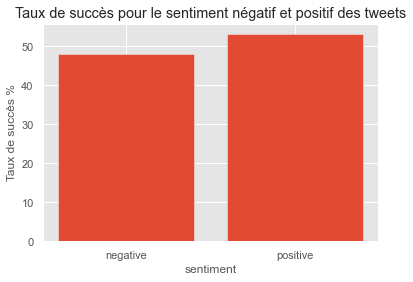

In [15]:
sent = ['negative', 'positive']
xs = [i + 0.1 for i, _ in enumerate(sent)]

plt.bar(xs, taux_success)
plt.title("Taux de succès pour le sentiment négatif et positif des tweets")
plt.ylabel("Taux de succès %")
plt.xlabel("sentiment")
plt.xticks([i + 0.1 for i, _ in enumerate(sent)], sent)
plt.show()

Matrice de confusion

In [16]:
len(predicted)

2000

In [17]:
data_df_new['pred']= predicted

In [18]:
df_count = pd.DataFrame({'pred': data_df_new['pred'].value_counts().index,
                            'Nombre': data_df_new['pred'].value_counts().values})
df_count


,pred,Nombre
0,0,1255
1,1,745


In [19]:
data_df_new['pred']= predicted


In [20]:
x = data_df_new['target_bin'].value_counts()
null_row= pd.Series({'null':2})
x=x.append(null_row)
x

0       1000
1       1000
null       2
dtype: int64

df_count = pd.DataFrame({'target_pred': data_df_new['pred'].value_counts().index,
                            'Nombre_pred': data_df_new['pred'].value_counts().values,
                         'target': x.index,
                         'Nombre target': x.values,
                         })
df_count

In [21]:
data_ref = data_df_new
data_df_new = data_df_new.drop(data_df_new[data_df_new['pred'] == 2].index)
data_df_new = data_df_new.drop(data_df_new[data_df_new['pred'] == 3].index)
data_df_new

,Unnamed: 0,tweet,target,target_bin,pred
0,30,@alielayus I want to go to promote GEAR AND GR...,negative,0,0
1,198,couldn't get shit done today ~ i'm so screwed,negative,0,0
2,362,@Sara_Kate Im afraid too ( ur reply about uni...,negative,0,0
3,1279,"Yo jimo i cant talk on aim anymore, its glitch...",negative,0,0
4,2112,@rustyrockets do I sense a blog coming on? To...,negative,0,0
...,...,...,...,...,...
1995,1592304,@andrewtkelley that strawberry shortcake looks...,positive,1,1
1996,1594844,@WinonaWiefel thanks,positive,1,1
1997,1594991,photographing Day of the African Child celebra...,positive,1,0
1998,1599678,@jasontancy thanks!,positive,1,1


In [40]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score


def ConfusionMatrix(y_pred, y_test):
    cf_matrix = confusion_matrix(y_pred, y_test)

    categories  = ['Negative','Positive']

    group_names = ['True Neg','False Neg', 'False Pos','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    true_neg = round((cf_matrix[0][0])*100 / (cf_matrix[0][0]+cf_matrix[1][0]),2)
    false_pos = round(100 - true_neg,2)
    false_neg = round((cf_matrix[0][1])*100 / (cf_matrix[0][1]+cf_matrix[1][1]),2)
    tru_pos = round(100 - false_neg,2)
    print(true_neg ,tru_pos,false_pos,false_neg)
    label_v2 =[f'True Neg {true_neg}% classe réel',f'False Neg {false_neg}% classe réel', f'False Pos {false_pos}% classe réel',f'True Pos {tru_pos}% classe réel']
    print("true neg ",true_neg ,' falsepos ',false_pos ,' falseneg ',false_neg ,' true pos',tru_pos)
    group = [value for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    print(cf_matrix)
    print(cf_matrix[0])
    print(cf_matrix[0] [0])
    labels = [f'{v1}  {v2}' for v1, v2 in zip(group_names,group_percentages)]
    print('Ancien',labels)
    print(group_percentages)
    print(float(group_percentages[0].replace("%",""))+float(group_percentages[1].replace("%","")))
    categories_y  = [f'Negative ',
                     f'Positive ']

    categories_x  = [f'Negative 100% n: {cf_matrix[0][1]+cf_matrix[1][1]}',

                     f'Positive 100% n: {cf_matrix[0][0]+cf_matrix[1][0]}']
    labels = np.asarray(labels).reshape(2,2)
    label_v2 = np.asarray(label_v2).reshape(2,2)
    print("Nouveau label",label_v2)

    sns.heatmap(cf_matrix, annot = label_v2, cmap = 'Blues',fmt = '',
                xticklabels = categories_x, yticklabels = categories_y)

    plt.ylabel("Classe prédite", fontdict = {'size':14}, labelpad = 10)
    plt.xlabel("Classe réelle"   , fontdict = {'size':14}, labelpad = 10)
    plt.title (f"Matrice de confusion n:{len(y_pred)}", fontdict = {'size':18}, pad = 20)

78.6 53.1 21.4 46.9
true neg  78.6  falsepos  21.4  falseneg  46.9  true pos 53.1
[[786 469]
 [214 531]]
[786 469]
786
Ancien ['True Neg  39.30%', 'False Neg  23.45%', 'False Pos  10.70%', 'True Pos  26.55%']
['39.30%', '23.45%', '10.70%', '26.55%']
62.75
Nouveau label [['True Neg 78.6% classe réel' 'False Neg 46.9% classe réel']
 ['False Pos 21.4% classe réel' 'True Pos 53.1% classe réel']]


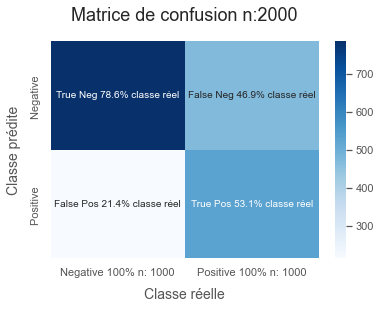

In [41]:
ConfusionMatrix(data_df_new['pred'], data_df_new['target_bin'])

In [24]:
def ConfusionMatrix2(y_pred, y_test):
    cf_matrix = confusion_matrix(y_pred, y_test)

    categories  = ['Negative','Positive']

    group_names = ['True Neg','False Neg', 'False Pos','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}  {v2}' for v1, v2 in zip(group_names,group_percentages)]
    print(labels)
    print(group_percentages)
    print(float(group_percentages[0].replace("%",""))+float(group_percentages[1].replace("%","")))
    categories_y  = [f'Negative {round(float(group_percentages[0].replace("%",""))+float(group_percentages[1].replace("%","")),2)}%',
                     f'Positive {round(float(group_percentages[2].replace("%",""))+float(group_percentages[3].replace("%","")),2)}%']
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories_y)

    plt.ylabel("Classe prédite", fontdict = {'size':14}, labelpad = 10)
    plt.xlabel("Classe réelle"   , fontdict = {'size':14}, labelpad = 10)
    plt.title (f"Matrice de confusion n:{len(y_pred)}", fontdict = {'size':18}, pad = 20)

In [27]:
df_count = pd.DataFrame({'target_pred': data_df_new['pred'].value_counts().index,
                            'Nombre_pred': data_df_new['pred'].value_counts().values,
                         'target': data_df_new['target_bin'].value_counts().index,
                         'Nombre target': data_df_new['target_bin'].value_counts().values,
                         })
df_count

,target_pred,Nombre_pred,target,Nombre target
0,0,1255,0,1000
1,1,745,1,1000


In [28]:
data_df_new['target_bin'].value_counts().values

array([1000, 1000], dtype=int64)

In [29]:
data_df_new['target_bin'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [30]:
data_df_new['pred'].value_counts().values

array([1255,  745], dtype=int64)

In [31]:
data_df_new['pred'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [32]:
from sklearn.metrics import classification_report

print("API report: \n\n",
      classification_report(data_df_new['pred'],  data_df_new['target_bin']))

API report: 

               precision    recall  f1-score   support

           0       0.79      0.63      0.70      1255
           1       0.53      0.71      0.61       745

    accuracy                           0.66      2000
   macro avg       0.66      0.67      0.65      2000
weighted avg       0.69      0.66      0.66      2000



Accuracy

In [33]:
report = classification_report(data_df_new['pred'],  data_df_new['target_bin'], output_dict=True)

In [34]:

df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
0,0.786000,0.626295,0.697118,1255.0000
1,0.531000,0.712752,0.608596,745.0000
accuracy,0.658500,0.658500,0.658500,0.6585
macro avg,0.658500,0.669523,0.652857,2000.0000
weighted avg,0.691013,0.658500,0.664143,2000.0000


In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(data_df_new['pred'],  data_df_new['target_bin'])
acc

0.6585

In [36]:
ari = adjusted_rand_score(data_df_new['pred'],  data_df_new['target_bin'])

In [37]:
hyperparamters_performances=pd.DataFrame(columns=['Accuracy_val','ARI','Times(s)'])
hyperparamters_performances.append(
    pd.Series(data={
                    'Accuracy_val':acc,
                    'ARI':ari,
                    'Times(s)':(stop-start) },name="Api"))

,Accuracy_val,ARI,Times(s)
Api,0.6585,0.100068,340.576967


Exemple d'erreur



In [38]:
err = data_df_new[data_df_new['pred'] != data_df_new['target_bin']]
err.head(5)

,Unnamed: 0,tweet,target,target_bin,pred
15,10575,prepay for my BM lisan karangan now...,negative,0,1
16,12408,@adlantis Clean Me!,negative,0,1
23,16030,Not Much To Say .. I'm Just Missin' Him!!,negative,0,1
32,25246,@nicholasmegalis I'm an oldschool Joker fan ev...,negative,0,1
35,26990,@delightful9 but tegan is in victoria right no...,negative,0,1


In [39]:
print(err.tweet.iloc[0])
print(err.tweet.iloc[1])
print(err.tweet.iloc[2])
print('pred:',err.pred.iloc[5],'text',err.tweet.iloc[5])
print('pred:',err.pred.iloc[8],'text',err.tweet.iloc[8])

print('pred:',err.pred.iloc[545],'text',err.tweet.iloc[545])



prepay for my BM lisan karangan now... 
@adlantis  Clean Me!
Not Much To Say .. I'm Just Missin' Him!! 
pred: 1 text OMG, just realized I have missed my locking dance class this afternoon!! 
pred: 1 text jazz_santi follows me now, hes freaking awesome, a great supririsie to wake up to...especily if u wear to be in school like 4 hours ago 
pred: 0 text just bored and about to FINALLY ;o get off of myspace 
